In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('nilai.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(15, 2)

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.describe()

,Hours,Scores
count,15.000000,15.000000
mean,4.833333,48.066667
std,2.623429,25.327756
min,1.100000,17.000000
25%,2.950000,26.000000
50%,4.500000,42.000000
75%,6.800000,68.500000
max,9.200000,88.000000


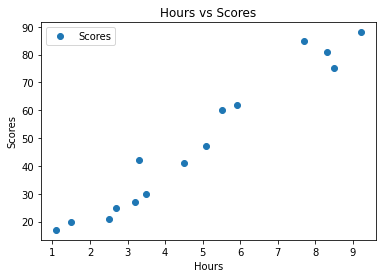

In [7]:
df.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

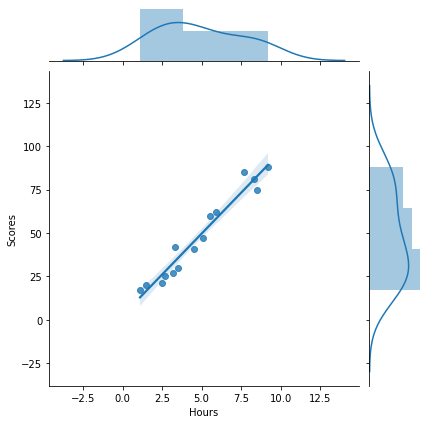

In [8]:
sns.jointplot(x=df['Hours'], y=df['Scores'], data=df, kind='reg')

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print(regressor.intercept_)

2.3275200558074616


In [13]:
print(regressor.coef_)

[9.56051622]


In [14]:
y_pred = regressor.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,47,51.086153
1,88,90.284269
2,81,81.679805


In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Model R^2 Square value', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.3500755726078424
Mean Squared Error: 7.458888326959026
Root Mean Squared Error: 2.7310965429583454
Model R^2 Square value 0.9767394334918118


Text(0.5, 1.0, 'Linear Regression')

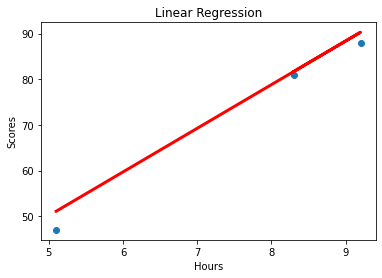

In [17]:
#Model Regression line on test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Linear Regression')

Text(0, 0.5, 'Residual')

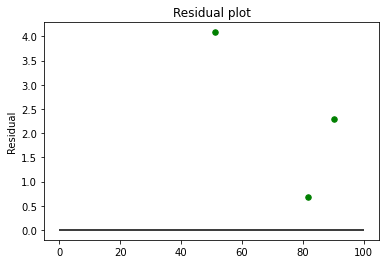

In [18]:
#Residual plot
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c='g', s = 30)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')